In [1]:
#Name: Rioborue Alexander Oghenerume
#Bio: Quantitative researcher in measurement and evaluation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, levene
df = pd.read_excel("Construction.xlsx")
print(df.head())

    Sex Qualification        Experience  Score1  Score2  Score3  Score4  \
0  Male      Master's  10 Years & Below       2       2       3       3   
1  Male    Bachelor's  10 Years & Below       2       1       2       1   
2  Male      Master's  10 Years & Below       2       1       2       1   
3  Male    Bachelor's  10 Years & Below       1       1       2       1   
4  Male    Bachelor's  10 Years & Below       2       2       1       1   

   Score5  Score6  Score7  ...  Score18  Score19  Score20  Score21  Score22  \
0       3       2       1  ...        2        4        2        1        4   
1       2       2       3  ...        1        2        3        3        3   
2       2       1       3  ...        1        2        2        3        2   
3       2       2       2  ...        1        2        3        2        3   
4       2       2       1  ...        1        4        2        4        3   

   Score23  Score24  Score25  Score26  Score27  
0        1        1      

In [2]:
missing_values = df.isnull().sum()
sex_distribution = df['Sex'].value_counts()
qualification_distribution = df['Qualification'].value_counts()
experience_distribution = df['Experience'].value_counts()
print("Frequency Distribution for Sex:")
print(sex_distribution)
print("\nFrequency Distribution for Qualification:")
print(qualification_distribution)
print("\nFrequency Distribution for Experience:")
print(experience_distribution)
print("\nMissing Values (if any):")
print(missing_values)

Frequency Distribution for Sex:
Sex
Female    1001
Male       595
Name: count, dtype: int64

Frequency Distribution for Qualification:
Qualification
Bachelor's    1074
Master's       522
Name: count, dtype: int64

Frequency Distribution for Experience:
Experience
10 Years & Below    871
Over 10 Years       725
Name: count, dtype: int64

Missing Values (if any):
Sex              0
Qualification    0
Experience       0
Score1           0
Score2           0
Score3           0
Score4           0
Score5           0
Score6           0
Score7           0
Score8           0
Score9           0
Score10          0
Score11          0
Score12          0
Score13          0
Score14          0
Score15          0
Score16          0
Score17          0
Score18          0
Score19          0
Score20          0
Score21          0
Score22          0
Score23          0
Score24          0
Score25          0
Score26          0
Score27          0
dtype: int64


Text(0, 0.5, 'Count')

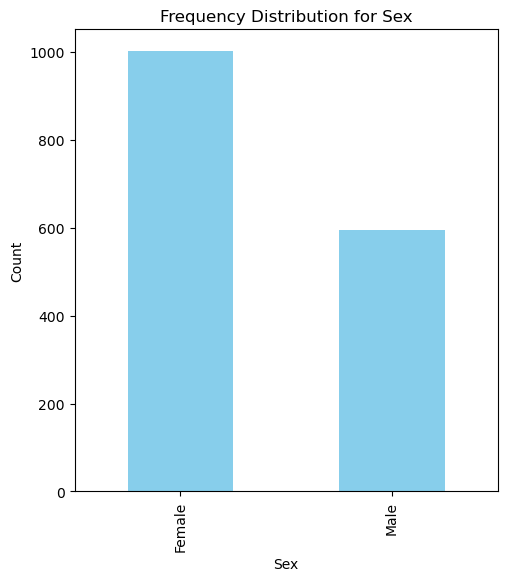

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sex_distribution = df['Sex'].value_counts()
sex_distribution.plot(kind='bar', color='skyblue')
plt.title("Frequency Distribution for Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

Text(0, 0.5, '')

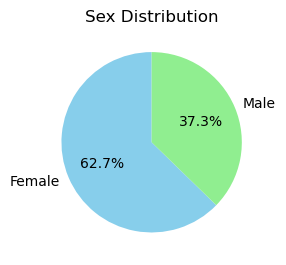

In [4]:
plt.subplot(1, 2, 2)
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title("Sex Distribution")
plt.ylabel("")

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Count')

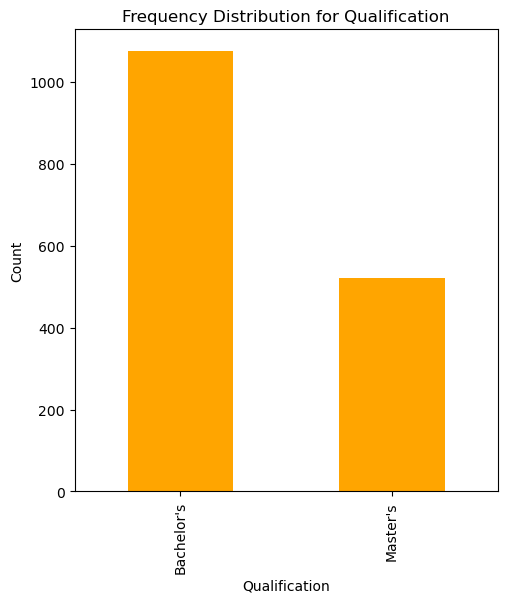

In [5]:
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
qualification_distribution = df['Qualification'].value_counts()
qualification_distribution.plot(kind='bar', color='orange')
plt.title("Frequency Distribution for Qualification")
plt.xlabel("Qualification")
plt.ylabel("Count")

Text(0, 0.5, '')

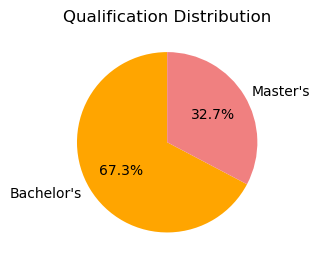

In [6]:
plt.subplot(1, 2, 2)
qualification_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'lightcoral'])
plt.title("Qualification Distribution")
plt.ylabel("")

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Count')

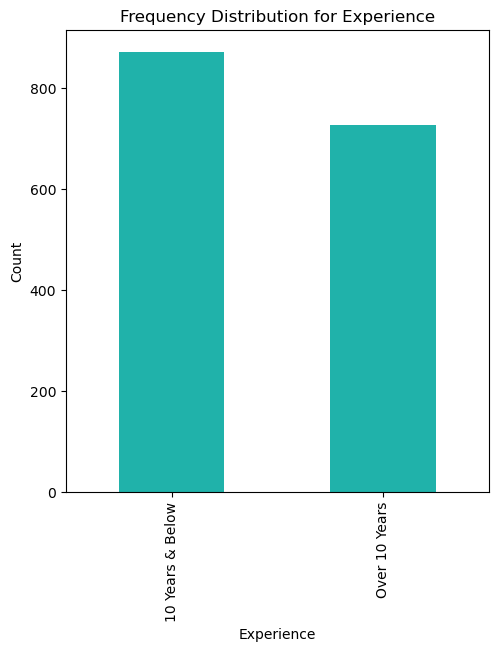

In [7]:
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
experience_distribution = df['Experience'].value_counts()
experience_distribution.plot(kind='bar', color='lightseagreen')
plt.title("Frequency Distribution for Experience")
plt.xlabel("Experience")
plt.ylabel("Count")

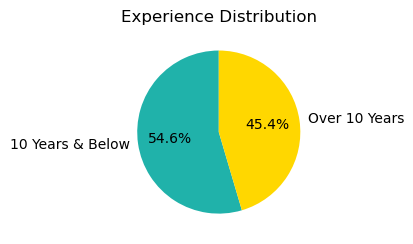

In [8]:
plt.subplot(1, 2, 2)
experience_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'gold'])
plt.title("Experience Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [9]:
df['Total_Score'] = df[['Score1', 'Score2', 'Score3', 'Score4', 'Score5', 'Score6', 'Score7', 'Score8', 
                        'Score9', 'Score10', 'Score11', 'Score12', 'Score13', 'Score14', 'Score15', 'Score16', 
                        'Score17', 'Score18', 'Score19', 'Score20', 'Score21', 'Score22', 'Score23', 'Score24', 
                        'Score25', 'Score26', 'Score27']].sum(axis=1)
mean_score = df['Total_Score'].mean()
std_dev_score = df['Total_Score'].std()
scale_mean = 67.5
n = df.shape[0]
total_score_sum = df['Total_Score'].sum()
print(f"Dexterity Level of Test Construction")
print(f"Variable       n = {n}        Sum = {total_score_sum}       Mean = {mean_score:.2f} ± {std_dev_score:.2f}    Scale Mean = {scale_mean}   Verdict")
if mean_score < scale_mean:
    verdict = "Low"
else:
    verdict = "High"
print(f"Verdict: {verdict}")

Dexterity Level of Test Construction
Variable       n = 1596        Sum = 91808       Mean = 57.52 ± 16.95    Scale Mean = 67.5   Verdict
Verdict: Low


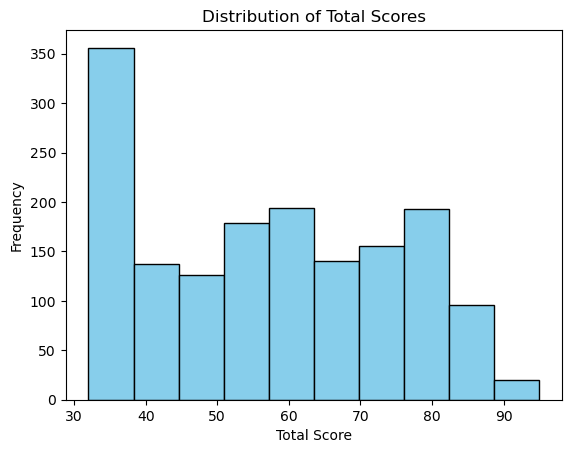

In [10]:
plt.hist(df['Total_Score'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

In [11]:
male_scores = df[df['Sex'] == "Male"]['Total_Score']
female_scores = df[df['Sex'] == "Female"]['Total_Score']
levene_stat, levene_p = levene(male_scores, female_scores)
print("Levene's Test for Equality of Variances:")
print(f"Statistic: {levene_stat:.4f}, P-Value: {levene_p:.4f}")
if levene_p > 0.05:
    print("Equal variance is assumed (p > 0.05).")
    equal_var = True
else:
    print("Equal variance is NOT assumed (p ≤ 0.05).")
    equal_var = False
t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=equal_var)
if equal_var:
    df = male_scores.shape[0] + female_scores.shape[0] - 2
else:
    df = None
print("\nIndependent Samples t-test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if equal_var:
    print(f"Degrees of Freedom (Equal Variance): {df}")
else:
    print("Degrees of Freedom (Welch's t-test): Calculated internally by ttest_ind")
alpha = 0.05
if p_value < alpha:
    print("Conclusion: There is a significant difference in Total_Score based on Sex.")
else:
    print("Conclusion: There is no significant difference in Total_Score based on Sex.")

Levene's Test for Equality of Variances:
Statistic: 1.1674, P-Value: 0.2801
Equal variance is assumed (p > 0.05).

Independent Samples t-test Results:
T-Statistic: 7.6264
P-Value: 0.0000
Degrees of Freedom (Equal Variance): 1594
Conclusion: There is a significant difference in Total_Score based on Sex.
